# Importando Bibliotecas utilizadas no projeto

In [63]:
import pandas as pd
import plotly.express as px 
import dash 
import dash_core_components as dcc
import dash_html_components as html
import datetime
from IPython.display import Image

# Convertendo o aruivo CSV em um DataFrame

In [54]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin-1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [55]:
df['Data Pedido'] = pd.to_datetime(df['ORDERDATE'])
df['Ano'] = df['Data Pedido'].dt.year
df['Mes'] = df['Data Pedido'].dt.month_name()


In [56]:
df.loc[df['Ano'] == 2003, 'Ano'] = 2019
df.loc[df['YEAR_ID'] == 2003, 'YEAR_ID'] = 2019 
df.loc[df['Ano'] == 2004, 'Ano'] = 2020
df.loc[df['YEAR_ID'] == 2004, 'YEAR_ID'] = 2020
df.loc[df['Ano'] == 2005, 'Ano'] = 2021
df.loc[df['YEAR_ID'] == 2005, 'YEAR_ID'] = 2021

In [57]:
df = df.drop(columns='ORDERDATE')

# Filtrando os dados de vendas por país

In [58]:
vendas_por_pais = df.groupby('COUNTRY').sum()['SALES']
vendas_por_pais

COUNTRY
Australia       630623.10
Austria         202062.53
Belgium         108412.62
Canada          224078.56
Denmark         245637.15
Finland         329581.91
France         1110916.52
Germany         220472.09
Ireland          57756.43
Italy           374674.31
Japan           188167.81
Norway          307463.70
Philippines      94015.73
Singapore       288488.41
Spain          1215686.92
Sweden          210014.21
Switzerland     117713.56
UK              478880.46
USA            3627982.83
Name: SALES, dtype: float64

# Filtrando os dados de vendas por ano

In [59]:
vendas_por_ano = df.groupby('Ano').sum()['SALES']
vendas_por_ano

Ano
2019    3516979.54
2020    4724162.60
2021    1791486.71
Name: SALES, dtype: float64

In [60]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Data Pedido,Ano,Mes
0,10107,30,95.70,2,2871.00,Shipped,1,2,2019,Motorcycles,...,NY,10022,USA,NaN,Yu,Kwai,Small,2003-02-24,2019,February
1,10121,34,81.35,5,2765.90,Shipped,2,5,2019,Motorcycles,...,NaN,51100,France,EMEA,Henriot,Paul,Small,2003-05-07,2019,May
2,10134,41,94.74,2,3884.34,Shipped,3,7,2019,Motorcycles,...,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,2003-07-01,2019,July
3,10145,45,83.26,6,3746.70,Shipped,3,8,2019,Motorcycles,...,CA,90003,USA,NaN,Young,Julie,Medium,2003-08-25,2019,August
4,10159,49,100.00,14,5205.27,Shipped,4,10,2019,Motorcycles,...,CA,NaN,USA,NaN,Brown,Julie,Medium,2003-10-10,2019,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,Shipped,4,12,2020,Ships,...,NaN,28034,Spain,EMEA,Freyre,Diego,Small,2004-12-02,2020,December
2819,10373,29,100.00,1,3978.51,Shipped,1,1,2021,Ships,...,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,2005-01-31,2021,January
2820,10386,43,100.00,4,5417.57,Resolved,1,3,2021,Ships,...,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,2005-03-01,2021,March
2821,10397,34,62.24,1,2116.16,Shipped,1,3,2021,Ships,...,NaN,31000,France,EMEA,Roulet,Annette,Small,2005-03-28,2021,March


# Gerando o layout com os graficos com a biblioteca Dash

In [62]:
app.layout = html.Div(
    html.Div([
        html.H1(children='Dashboard Vendas Veiculos'),

        html.Div(children='''
            Dashboard de Vendas - Minerando Dados
        '''),

        dcc.Graph(
            id='vendas-por-paises',
            figure={
                'data': [
                    {'x': vendas_por_pais.index, 'y':vendas_por_pais.values , 'type': 'bar', 'name': 'V-por-P'}
                     
                ],
                'layout': {
                    'title': 'Vendas Por Países',
                    'xaxis' : dict(
                        title='Países',
                        titlefont=dict(
                        family='Courier New, monospace',
                        size=18,
                        color='#7f7f7f'
                    )),
                    'yaxis' : dict(
                        title='Vendas [$]',
                        titlefont=dict(
                        family='Helvetica, monospace',
                        size=18,
                        color='#7f7f7f'
                    ))
                }
            }
        ),
         dcc.Graph(
            id='grafico-2',
            figure={
                'data': [
                    {'x': vendas_por_ano.index, 'y':vendas_por_ano.values , 'type': 'bar', 'name': 'V-por-Ano'},
                    {'x': vendas_por_ano.index, 'y':vendas_por_ano.values , 'type': 'line', 'name': 'V-por-Ano'}
                ],
                'layout': {
                    'title': 'Vendas Por Ano',
                    'xaxis' : dict(
                        title='Ano',
                        titlefont=dict(
                        family='Courier New, monospace',
                        size=18,
                        color='#7f7f7f'
                    )),
                    'yaxis' : dict(
                        title='Vendas',
                        titlefont=dict(
                        family='Helvetica, monospace',
                        size=18,
                        color='#7f7f7f'
                    ))
                }
            }
        )

    ])
)




if __name__ == '__main__':
    app.run_server(debug=True, port=8080, use_reloader = False)

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


# Imagem capturada dos Dashboards direto do servidor

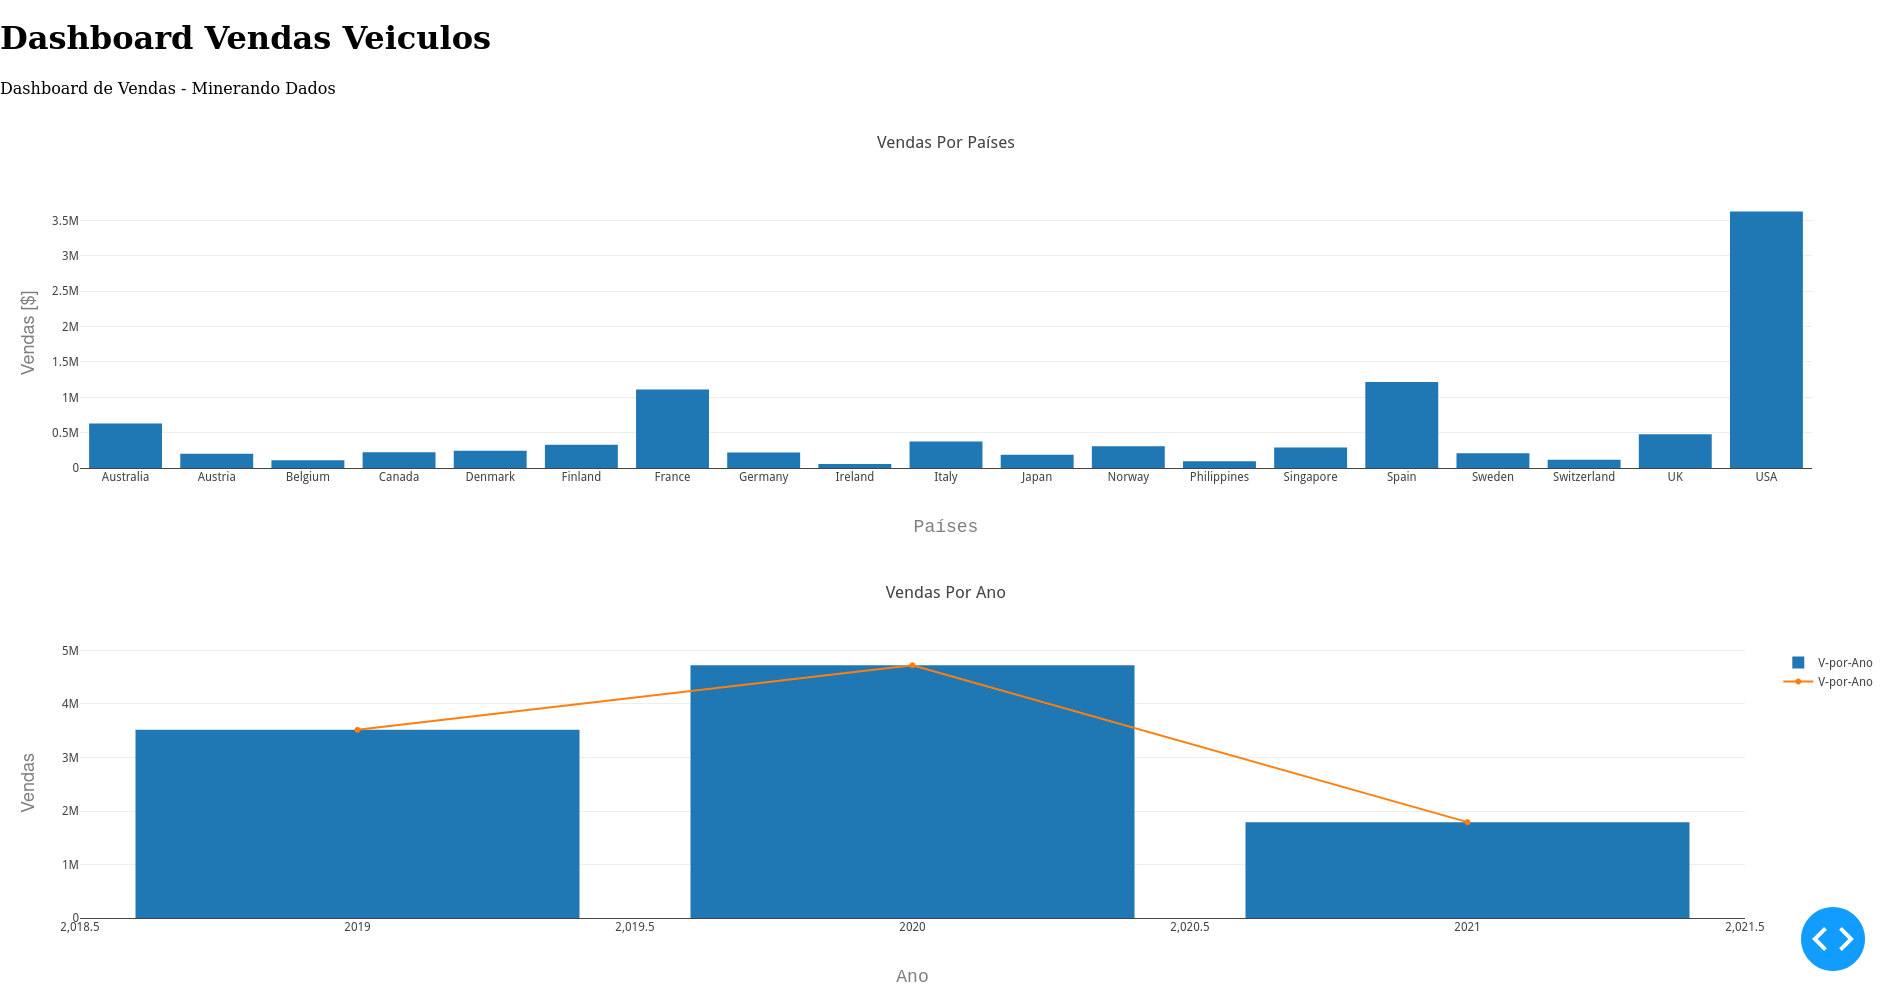

In [64]:
Image('Screenshot 2022-04-29 at 11-25-08 Dashboard.png')